In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\nakshatra.goswami\Downloads\MeanReversionStrategy_20250928_133319.csv")
df

,Unnamed: 0,Unnamed: 1,trade_type,price,sol_amount
0,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,2025-09-10T23:43:58+00:00,BUY,3.070000e-06,0.101167
1,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,2025-09-10T23:51:48+00:00,SELL,3.500000e-06,0.115281
2,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,2025-09-11T00:24:26+00:00,BUY,2.900000e-07,0.101317
3,8n2XWSL8mHX3mog9hSSPWeF4fX6bvYNKHEtdpiGxpump,2025-09-11T00:24:43+00:00,SELL,7.000000e-08,0.023488
4,qoRjLsPoUyTVKCVs92nVfTbq8971ganqzz1Jrwqpump,2025-09-10T14:49:42+00:00,BUY,4.350000e-06,0.101117
...,...,...,...,...,...
2541,AcNia1KNYeaDAuswtpJJZpPqzpuFNyvjd7LbxMXSShji,2025-09-12T19:12:57Z,SELL,1.800000e-07,0.093154
2542,pBa6g2nx2J7CHwE8SbdXPdgh5M4QPkSHeeVgKt8pump,2025-09-12T22:02:50Z,SELL,2.530000e-06,0.078048
2543,26vHfdaUa5YrmUBvdEGgq9g5rrkka6zJbZfCSJbrpump,2025-09-12T19:55:59Z,SELL,2.000000e-08,0.075697
2544,By6gwWneQu5YXnX7nXyQA3wVg3U42Xfg54ufX1DCpump,2025-09-12T20:33:11Z,SELL,1.200000e-07,0.079931


In [2]:
# Rename columns for clarity
df = df.rename(columns={
    'Unnamed: 1': 'time',
    'trade_type': 'side',
    '# price': 'price',
    '# sol_amount': 'sol_amount'
})

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Separate buys and sells
buys = df[df['side'] == 'BUY'].reset_index(drop=True)
sells = df[df['side'] == 'SELL'].reset_index(drop=True)

trades = pd.DataFrame({
    "entry_time": buys['time'],
    "entry_price": buys['price'],
    # "entry_amount_SOL": buys['sol_amount'],
    "entry_tokens": buys['sol_amount'] / buys['price'],   # tokens bought
    "exit_time": sells['time'],
    "exit_price": sells['price'],
    # "exit_amount_SOL": sells['sol_amount'],
    "exit_tokens": sells['sol_amount'] / sells['price']   # tokens sold
})
trades

,entry_time,entry_price,entry_tokens,exit_time,exit_price,exit_tokens
0,2025-09-10 23:43:58+00:00,3.070000e-06,32953.420195,2025-09-10 23:51:48+00:00,3.500000e-06,3.293743e+04
1,2025-09-11 00:24:26+00:00,2.900000e-07,349368.965517,2025-09-11 00:24:43+00:00,7.000000e-08,3.355429e+05
2,2025-09-10 14:49:42+00:00,4.350000e-06,23245.287356,2025-09-10 14:58:11+00:00,3.670000e-06,2.325831e+04
3,2025-09-10 15:04:01+00:00,3.340000e-06,30289.520958,2025-09-10 15:05:24+00:00,3.370000e-06,3.023887e+04
4,2025-09-10 15:29:34+00:00,3.400000e-06,29755.000000,2025-09-10 15:30:54+00:00,3.820000e-06,2.974607e+04
...,...,...,...,...,...,...
1268,2025-09-08 19:57:57+00:00,1.400000e-07,723692.857143,2025-09-12 19:12:57+00:00,1.800000e-07,5.175222e+05
1269,2025-09-10 20:30:34+00:00,6.200000e-07,163333.870968,2025-09-12 22:02:50+00:00,2.530000e-06,3.084901e+04
1270,2025-09-09 22:43:46+00:00,2.780000e-06,36391.007194,2025-09-12 19:55:59+00:00,2.000000e-08,3.784850e+06
1271,2025-09-09 23:03:03+00:00,2.160000e-06,46859.722222,2025-09-12 20:33:11+00:00,1.200000e-07,6.660917e+05


In [3]:
trades.columns

Index(['entry_time', 'entry_price', 'entry_tokens', 'exit_time', 'exit_price',
       'exit_tokens'],
      dtype='object')

In [4]:
trades['entry_SOL'] = trades['entry_tokens'] * trades['entry_price']
trades['exit_SOL'] = trades['exit_tokens'] * trades['exit_price']

trades['PnL_SOL'] = trades['exit_SOL'] - trades['entry_SOL']
trades['cumulative_pnl'] = trades['PnL_SOL'].cumsum()
trades


,entry_time,entry_price,entry_tokens,exit_time,exit_price,exit_tokens,entry_SOL,exit_SOL,PnL_SOL,cumulative_pnl
0,2025-09-10 23:43:58+00:00,3.070000e-06,32953.420195,2025-09-10 23:51:48+00:00,3.500000e-06,3.293743e+04,0.101167,0.115281,0.014114,0.014114
1,2025-09-11 00:24:26+00:00,2.900000e-07,349368.965517,2025-09-11 00:24:43+00:00,7.000000e-08,3.355429e+05,0.101317,0.023488,-0.077829,-0.063715
2,2025-09-10 14:49:42+00:00,4.350000e-06,23245.287356,2025-09-10 14:58:11+00:00,3.670000e-06,2.325831e+04,0.101117,0.085358,-0.015759,-0.079474
3,2025-09-10 15:04:01+00:00,3.340000e-06,30289.520958,2025-09-10 15:05:24+00:00,3.370000e-06,3.023887e+04,0.101167,0.101905,0.000738,-0.078736
4,2025-09-10 15:29:34+00:00,3.400000e-06,29755.000000,2025-09-10 15:30:54+00:00,3.820000e-06,2.974607e+04,0.101167,0.113630,0.012463,-0.066273
...,...,...,...,...,...,...,...,...,...,...
1268,2025-09-08 19:57:57+00:00,1.400000e-07,723692.857143,2025-09-12 19:12:57+00:00,1.800000e-07,5.175222e+05,0.101317,0.093154,-0.008163,2.624396
1269,2025-09-10 20:30:34+00:00,6.200000e-07,163333.870968,2025-09-12 22:02:50+00:00,2.530000e-06,3.084901e+04,0.101267,0.078048,-0.023219,2.601177
1270,2025-09-09 22:43:46+00:00,2.780000e-06,36391.007194,2025-09-12 19:55:59+00:00,2.000000e-08,3.784850e+06,0.101167,0.075697,-0.025470,2.575707
1271,2025-09-09 23:03:03+00:00,2.160000e-06,46859.722222,2025-09-12 20:33:11+00:00,1.200000e-07,6.660917e+05,0.101217,0.079931,-0.021286,2.554421


<Axes: >

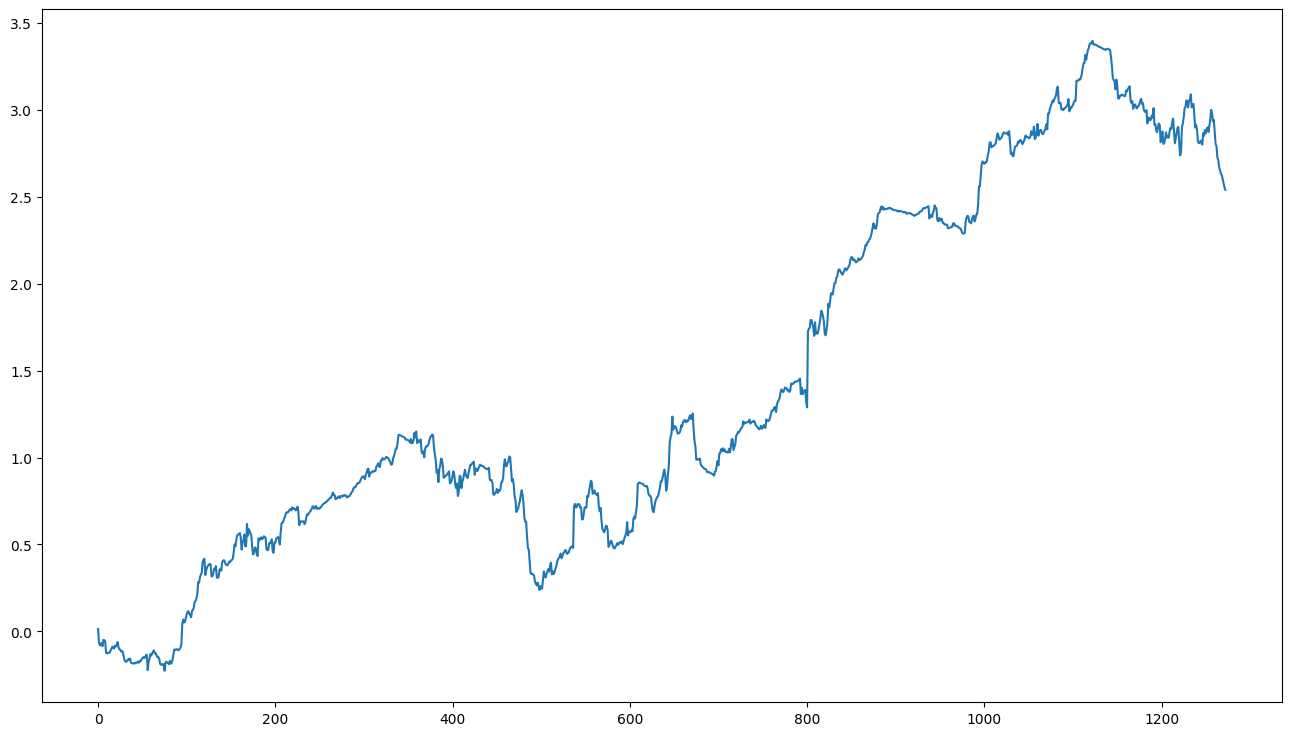

In [5]:
trades['cumulative_pnl'].plot(figsize=(16,9))

In [6]:
trades.columns

Index(['entry_time', 'entry_price', 'entry_tokens', 'exit_time', 'exit_price',
       'exit_tokens', 'entry_SOL', 'exit_SOL', 'PnL_SOL', 'cumulative_pnl'],
      dtype='object')

In [7]:
df=trades
stats = {
    'Total Trades': len(df),
    'Winning Trades': (df['PnL_SOL'] > 0).sum(),
    'Losing Trades': (df['PnL_SOL'] < 0).sum(),
    'Win Rate (%)': (df['PnL_SOL'] > 0).mean() * 100,
    'Average PnL per Trade': df['PnL_SOL'].mean(),
    'Median PnL': df['PnL_SOL'].median(),
    'Max Profit': df['PnL_SOL'].max(),
    'Max Loss': df['PnL_SOL'].min(),
    'PnL StdDev': df['PnL_SOL'].std(),
    'Total PnL': df['PnL_SOL'].sum(),
}
print(pd.Series(stats))

Total Trades             1273.000000
Winning Trades            735.000000
Losing Trades             538.000000
Win Rate (%)               57.737628
Average PnL per Trade       0.001995
Median PnL                  0.002581
Max Profit                  0.435927
Max Loss                   -0.096900
PnL StdDev                  0.031454
Total PnL                   2.539248
dtype: float64


In [8]:
df['entry_time'] = pd.to_datetime(df['entry_time'])
df['exit_time'] = pd.to_datetime(df['exit_time'])
df['hour'] = df['entry_time'].dt.hour
df['weekday'] = df['entry_time'].dt.day_name()
df['month'] = df['entry_time'].dt.month_name()

# Average PnL by hour
hourly_stats = df.groupby('hour')['PnL_SOL'].agg(['mean','sum','count'])

# Average PnL by weekday
weekday_stats = df.groupby('weekday')['PnL_SOL'].agg(['mean','sum','count'])

# Average PnL by month
month_stats = df.groupby('month')['PnL_SOL'].agg(['mean','sum','count'])

In [9]:
hourly_stats

,mean,sum,count
hour,,,
0,0.007554,0.249293,33
1,0.001215,0.049818,41
2,0.002387,0.100272,42
3,-0.000933,-0.037331,40
4,0.001962,0.086335,44
5,-0.001820,-0.081920,45
6,0.008674,0.546492,63
7,0.001452,0.088593,61
8,-0.001990,-0.099507,50


In [10]:
weekday_stats

,mean,sum,count
weekday,,,
Friday,0.010540,0.832698,79
Monday,0.003177,0.994251,313
Thursday,-0.001150,-0.328920,286
Tuesday,-0.002057,-0.471118,229
Wednesday,0.004132,1.512337,366


In [11]:
month_stats

,mean,sum,count
month,,,
September,0.001995,2.539248,1273


In [12]:
df['token_bucket'] = pd.qcut(df['entry_tokens'], 4, labels=['Small','Medium','Large','XL'])

token_stats = df.groupby('token_bucket')['PnL_SOL'].agg(['mean','sum','count','std','max','min'])
token_stats


,mean,sum,count,std,max,min
token_bucket,,,,,,
Small,0.002592,0.829287,320,0.022958,0.105888,-0.080782
Medium,0.002551,0.808693,317,0.029334,0.238345,-0.093623
Large,0.001595,0.507151,318,0.039393,0.435927,-0.094939
XL,0.001239,0.394117,318,0.032071,0.136161,-0.096900


In [13]:
def win_rate(x):
    return (x>0).mean()

# Hourly win rate
hour_winrate = df.groupby(df['exit_time'].dt.hour)['PnL_SOL'].apply(win_rate)
print(hour_winrate)

# By weekday
weekday_winrate = df.groupby(df['exit_time'].dt.day_name())['PnL_SOL'].apply(win_rate)
print(weekday_winrate)


exit_time
0     0.484848
1     0.604651
2     0.609756
3     0.520000
4     0.435897
5     0.673469
6     0.600000
7     0.524590
8     0.769231
9     0.750000
10    0.651163
11    0.580000
12    0.565217
13    0.620000
14    0.646154
15    0.638889
16    0.574468
17    0.411765
18    0.529412
19    0.634921
20    0.455882
21    0.530612
22    0.538462
23    0.571429
Name: PnL_SOL, dtype: float64
exit_time
Friday       0.541667
Monday       0.620130
Thursday     0.551601
Tuesday      0.530702
Wednesday    0.600000
Name: PnL_SOL, dtype: float64


In [14]:
# Average PnL by weekday and hour
heatmap = df.pivot_table(values='PnL_SOL', index=df['exit_time'].dt.day_name(), 
                         columns=df['exit_time'].dt.hour, aggfunc='mean')
print(heatmap)

exit_time        0         1         2         3         4         5   \
exit_time                                                               
Friday     0.010848  0.026779 -0.014983 -0.003803  0.003443  0.012492   
Monday    -0.015743  0.008983  0.016900  0.009419  0.012315  0.002082   
Thursday  -0.025809 -0.015319  0.009556 -0.004298  0.000010 -0.001296   
Tuesday    0.015456 -0.012827  0.017341 -0.013737 -0.007563  0.008440   
Wednesday -0.006969  0.019489  0.000117 -0.000017 -0.002039  0.013236   

exit_time        6         7         8         9   ...        14        15  \
exit_time                                          ...                       
Friday     0.007686 -0.015837  0.005318  0.006366  ... -0.018755  0.004550   
Monday    -0.001316 -0.000576 -0.005024  0.007409  ...  0.000486 -0.000654   
Thursday   0.014120 -0.022856  0.002413  0.001159  ... -0.013343  0.013065   
Tuesday   -0.014809  0.001551  0.022395  0.000997  ...  0.007257  0.000015   
Wednesday  0.014819 

In [15]:


# Count of trades by token bucket and weekday
trade_count = df.pivot_table(values='PnL_SOL', index='token_bucket', 
                             columns=df['weekday'], aggfunc='count')
print(trade_count)


weekday       Friday  Monday  Thursday  Tuesday  Wednesday
token_bucket                                              
Small             52      58        85       46         79
Medium             9     109        46       61         92
Large              9      85        68       51        105
XL                 9      61        87       71         90


In [16]:
# Trade duration in minutes
df['duration_min'] = (df['exit_time'] - df['entry_time']).dt.total_seconds() / 60

# Group by duration buckets
df['duration_bucket'] = pd.qcut(df['duration_min'], 4, labels=['Short','Medium','Long','XL'])
duration_stats = df.groupby('duration_bucket')['PnL_SOL'].agg(['mean','sum','count','std','max','min'])
print(duration_stats)


                     mean       sum  count       std       max       min
duration_bucket                                                         
Short            0.004026  1.284310    319  0.031545  0.126870 -0.093623
Medium           0.000416  0.132321    318  0.022953  0.071321 -0.095752
Long             0.002113  0.671831    318  0.035635  0.435927 -0.094939
XL               0.001418  0.450786    318  0.034176  0.238345 -0.096900


In [17]:
df.groupby(['token_bucket','weekday'])['PnL_SOL'].agg(
    mean_pnl='mean', total_pnl='sum', count='count', std_pnl='std', max_pnl='max', min_pnl='min')

mean_pnl  total_pnl  count   std_pnl   max_pnl  \
token_bucket weekday                                                     
Small        Friday     0.011767   0.611910     52  0.023626  0.105888   
             Monday     0.004381   0.254079     58  0.019193  0.052293   
             Thursday  -0.002479  -0.210699     85  0.026805  0.065912   
             Tuesday    0.000435   0.020002     46  0.021230  0.065374   
             Wednesday  0.001949   0.153995     79  0.019946  0.044093   
Medium       Friday     0.014315   0.128832      9  0.020113  0.037554   
             Monday     0.001680   0.183121    109  0.023132  0.111802   
             Thursday  -0.007651  -0.351934     46  0.029246  0.030475   
             Tuesday   -0.001170  -0.071386     61  0.024005  0.056347   
             Wednesday  0.010001   0.920060     92  0.037174  0.238345   
Large        Friday     0.002587   0.023285      9  0.021791  0.026314   
             Monday     0.005074   0.431322     85  0.057939  0.435927   
             Thursday  -0.001094  -0.074406     68  0.038160  0.126870   
             Tuesday   -0.000729  -0.037169     51  0.027948  0.054643   
             Wednesday  0.001563   0.164119    105  0.025518  0.078378   
XL           Friday     0.007630   0.068671      9  0.016644  0.038149   
             Monday     0.002061   0.125729     61  0.032388  0.051476   
             Thursday   0.003542   0.308119     87  0.028242  0.099297   
             Tuesday   -0.005388  -0.382565     71  0.036904  0.136161   
             Wednesday  0.003046   0.274163     90  0.032271  0.108027   

                         min_pnl  
token_bucket weekday              
Small        Friday    -0.025776  
             Monday    -0.070624  
             Thursday  -0.080782  
             Tuesday   -0.068551  
             Wednesday -0.077868  
Medium       Friday    -0.015966  
             Monday    -0.093623  
             Thursday  -0.082590  
             Tuesday   -0.076421  
             Wednesday -0.068611  
Large        Friday    -0.045150  
             Monday    -0.075801  
             Thursday  -0.074859  
             Tuesday   -0.094939  
             Wednesday -0.087706  
XL           Friday    -0.016075  
             Monday    -0.096900  
             Thursday  -0.077829  
             Tuesday   -0.095407  
             Wednesday -0.095752

In [18]:
df['pnl_quartile'] = pd.qcut(df['PnL_SOL'], 4, labels=['Q1','Q2','Q3','Q4'])

# Count trades per quartile by weekday
quartile_stats = df.groupby(['weekday','pnl_quartile'])['PnL_SOL'].count().unstack(fill_value=0)
print(quartile_stats)

pnl_quartile  Q1  Q2  Q3   Q4
weekday                      
Friday        12  16  27   24
Monday        61  92  92   68
Thursday      87  60  72   67
Tuesday       67  61  53   48
Wednesday     92  89  74  111
